In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

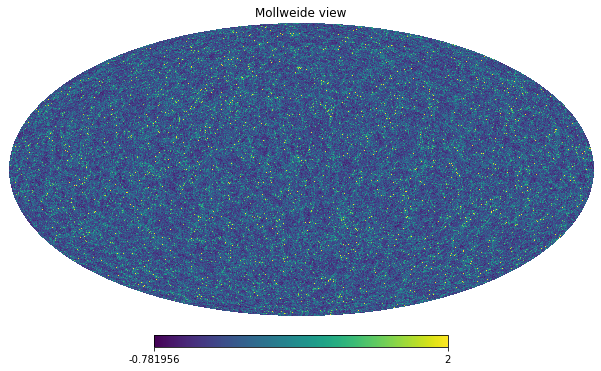

In [3]:
overdensity256 = hp.read_map("MAPS/overdensity_NS_1024_R_1024_P_1280_DV_256.fits")
overdensity128 = hp.read_map("MAPS/overdensity_NS_1024_R_1024_P_1280_DV_128.fits")
hp.mollview(overdensity128,xsize=6400, max=2)

In [4]:
psOver128 = hp.sphtfunc.anafast(overdensity128)
psOver256 = hp.sphtfunc.anafast(overdensity256)

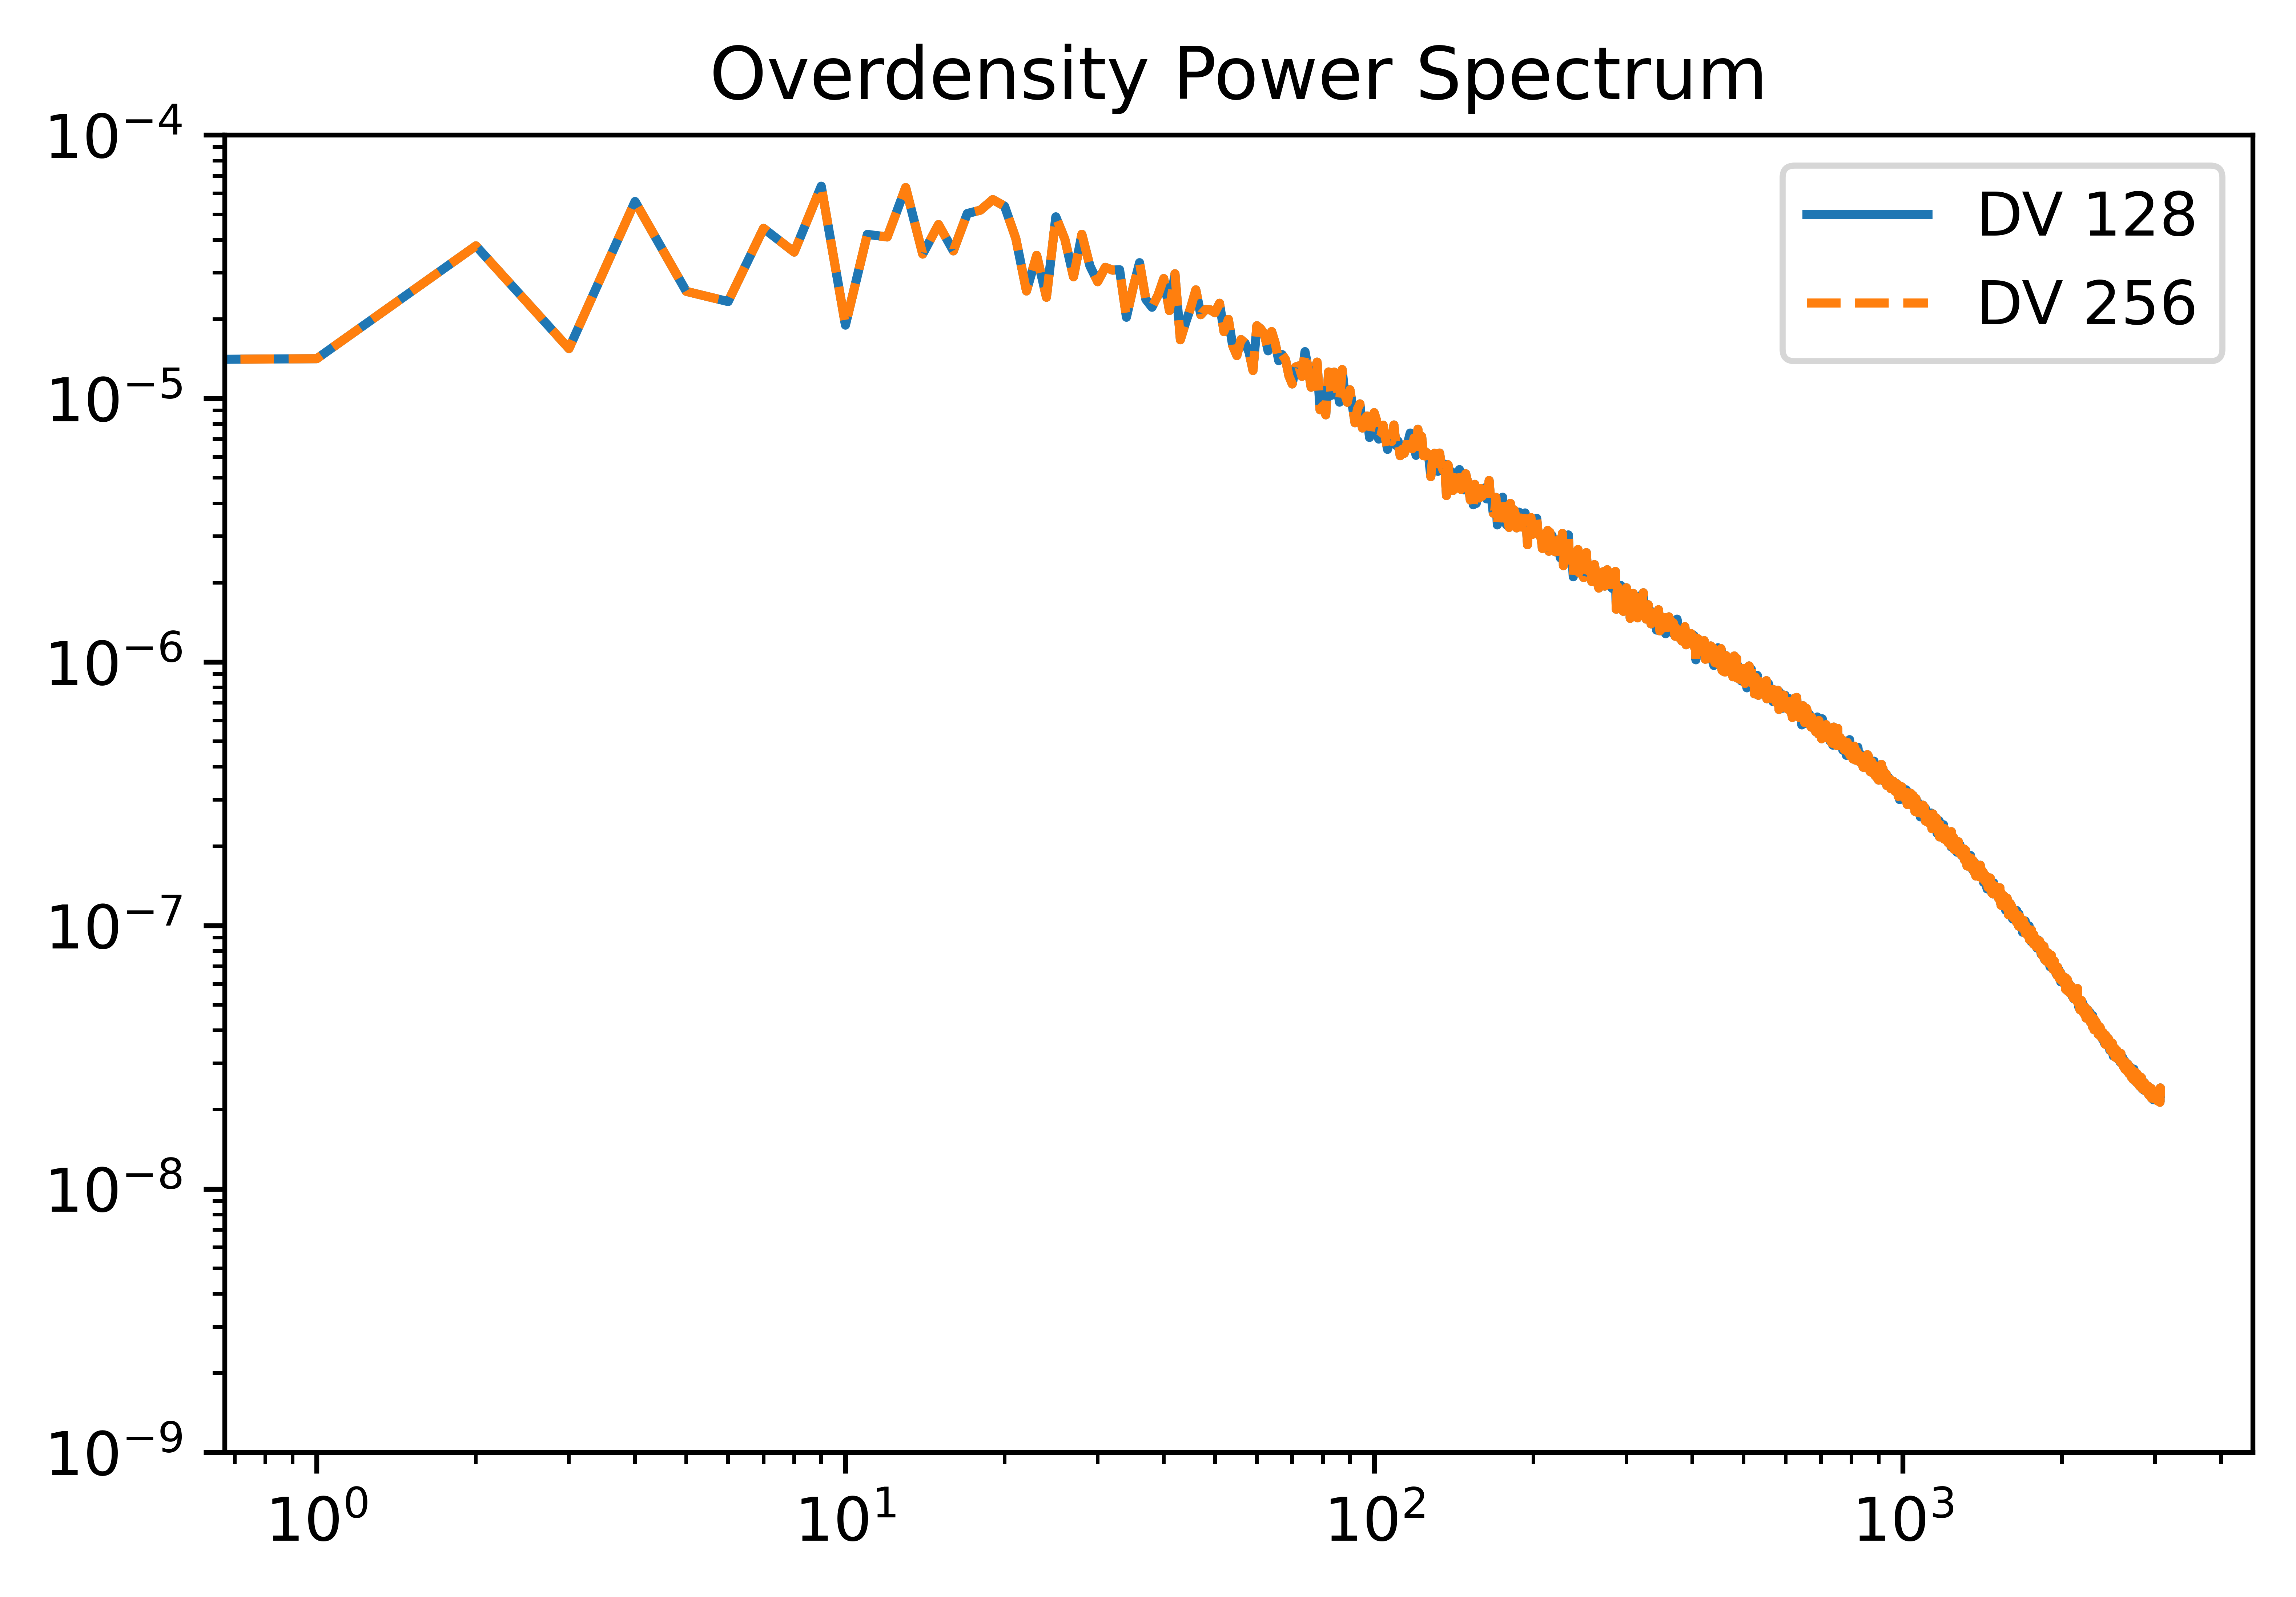

In [5]:
plt.figure(dpi=1200)
plt.loglog(psOver128);
plt.loglog(psOver256,"--");
plt.legend(loc=0, labels=["DV 128","DV 256"])
plt.title("Overdensity Power Spectrum")
plt.ylim(10**-9,10**-4)
plt.show()

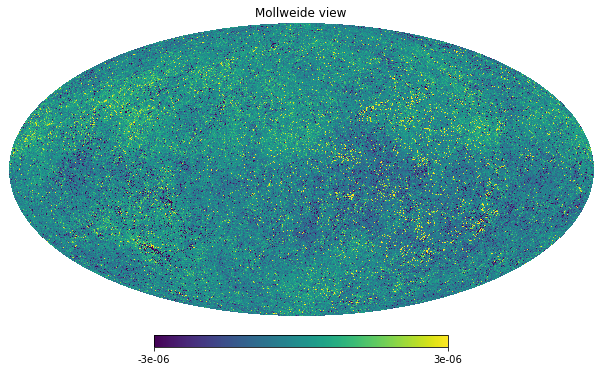

In [6]:
kSZ256 = hp.read_map("MAPS/kSZ_NS_1024_R_1024_P_1280_DV_256.fits")
kSZ128 = hp.read_map("MAPS/kSZ_NS_1024_R_1024_P_1280_DV_128.fits")
hp.mollview(kSZ128,xsize=6400, min=-3*10**-6,max=3*10**-6)

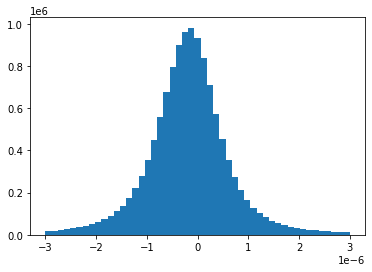

In [7]:
plt.hist(kSZ128,bins = np.linspace(-3*10**-6,3*10**-6));

In [8]:
pskSZ256 = hp.sphtfunc.anafast(kSZ256)
pskSZ128 = hp.sphtfunc.anafast(kSZ128)

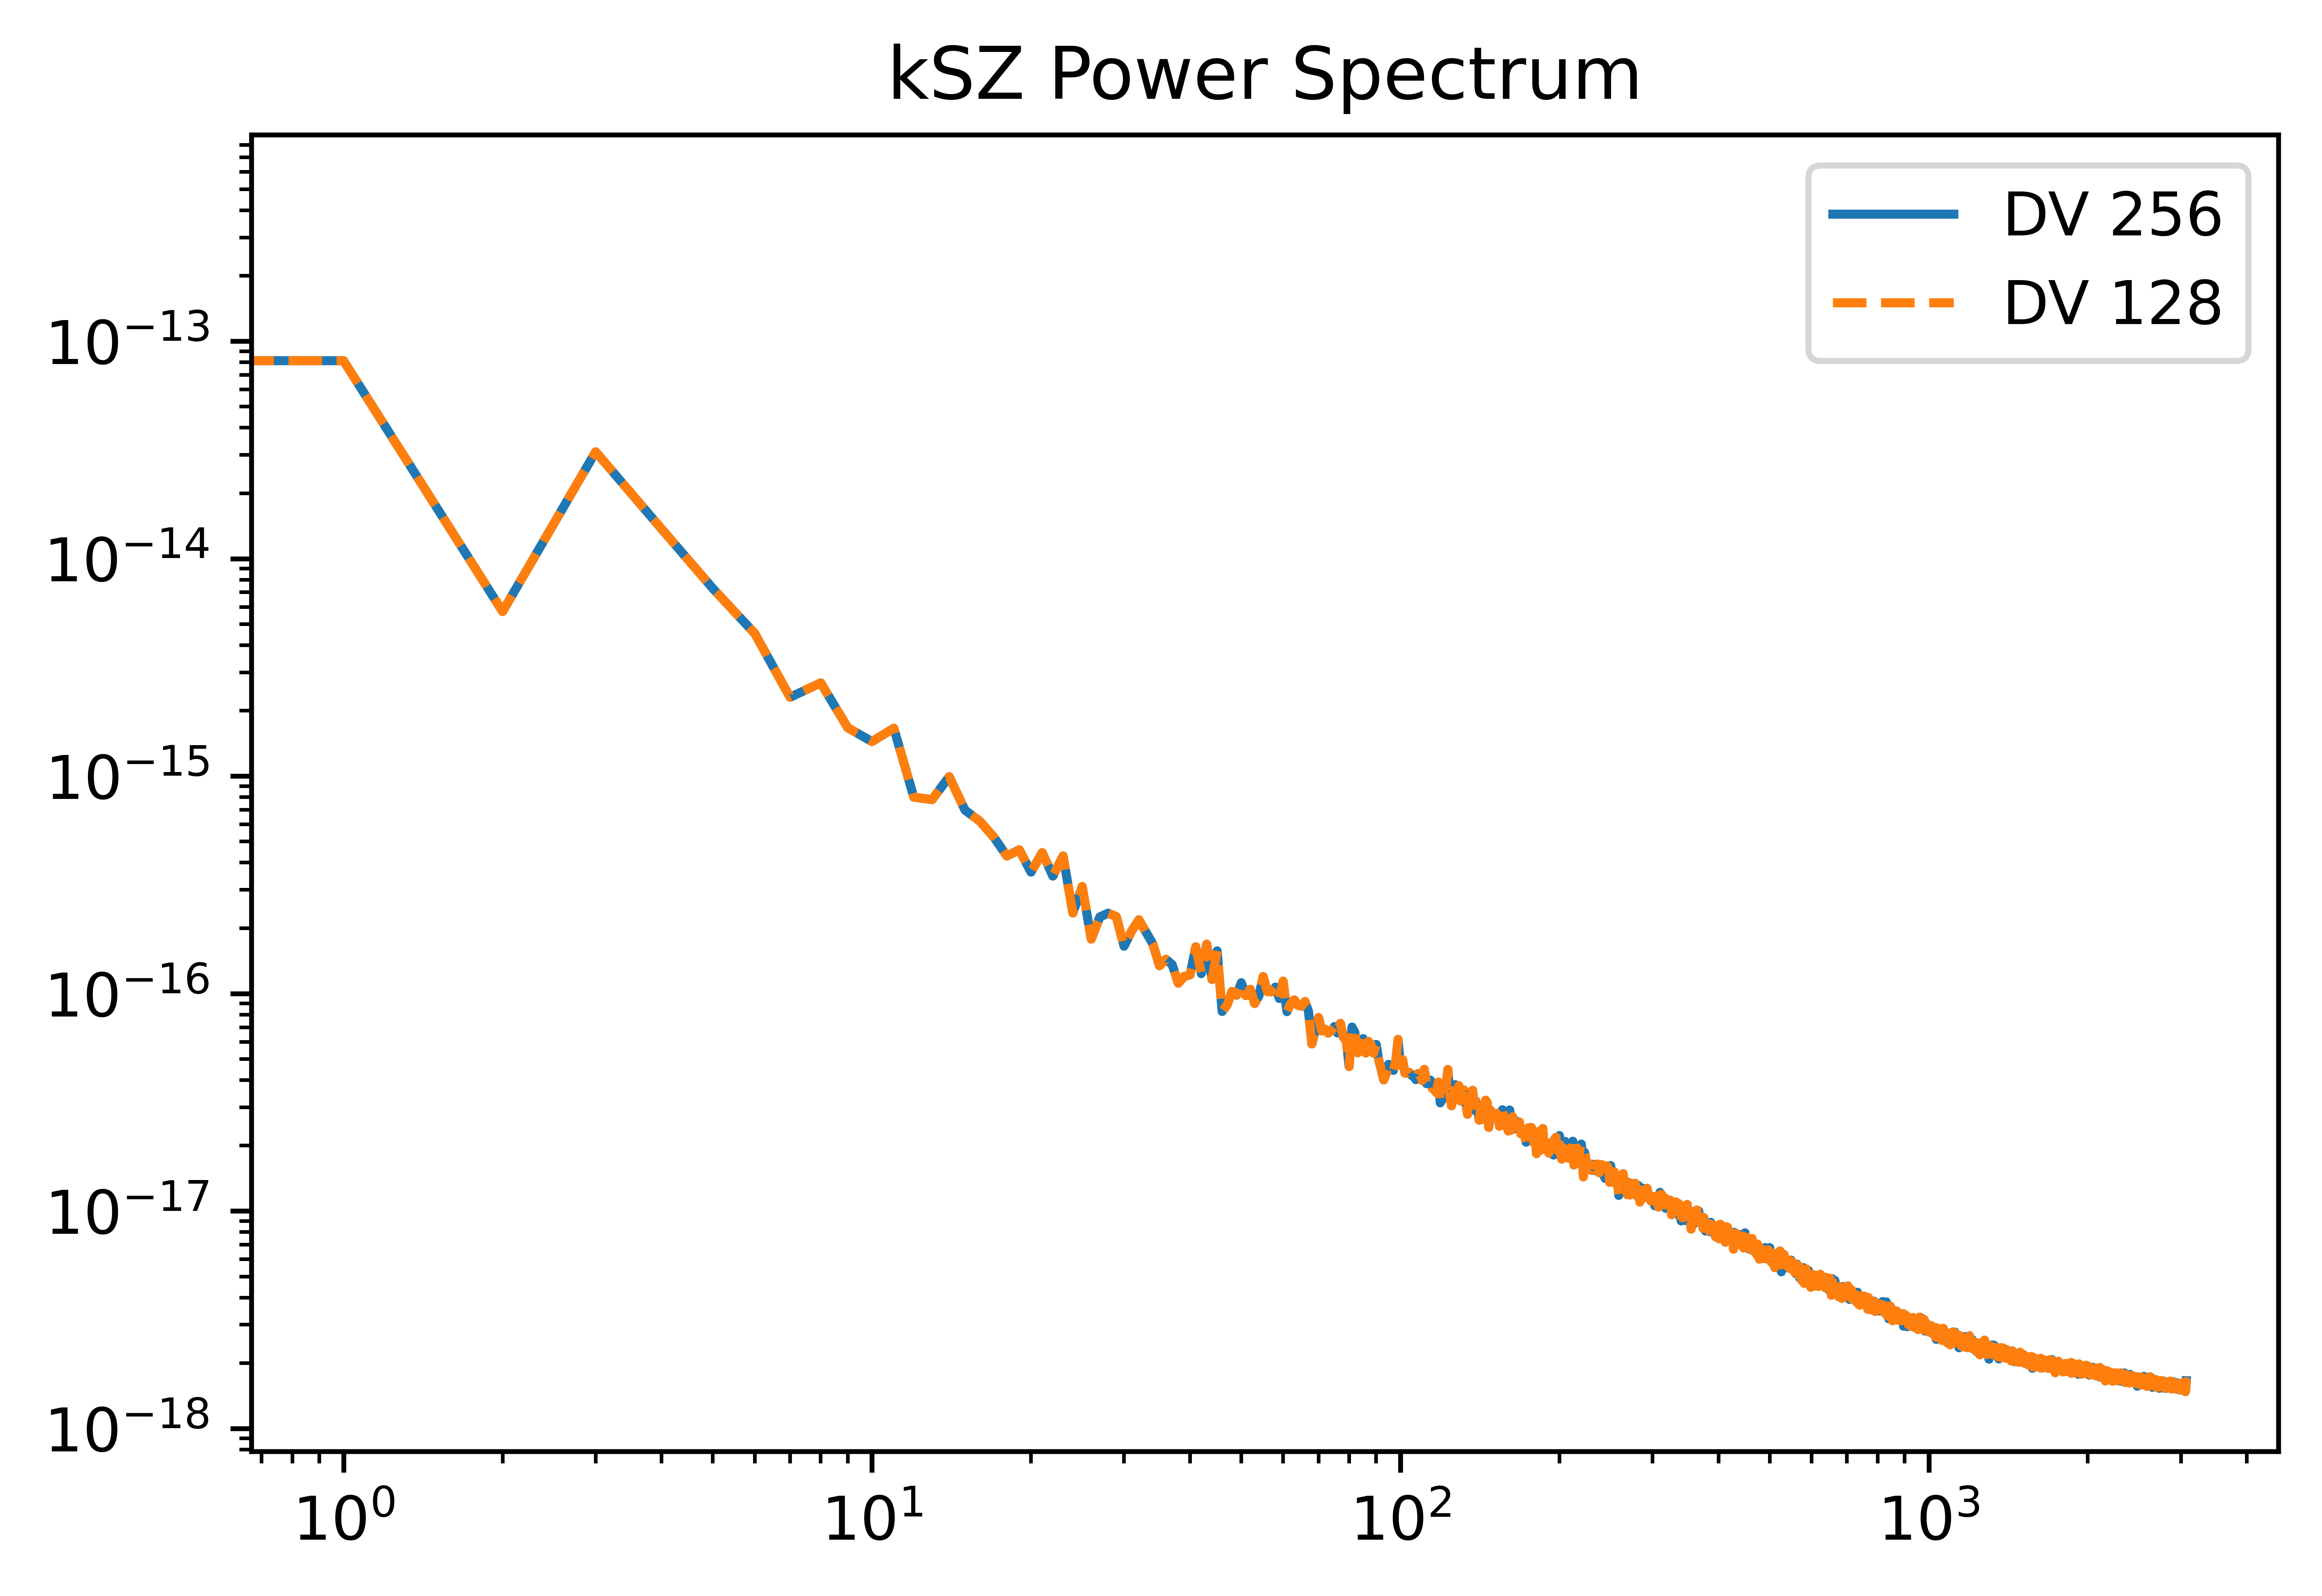

In [9]:
plt.figure(dpi=1200)
plt.loglog(pskSZ256);
plt.loglog(pskSZ128,"--");
plt.legend(loc=0, labels=["DV 256","DV 128"])
plt.title("kSZ Power Spectrum")
plt.show()

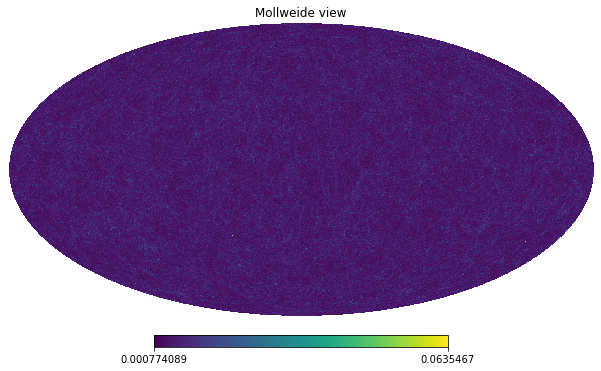

In [10]:
convergenceDV256 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1280_DV_256.fits")
convergenceDV128 = hp.read_map("MAPS/convergence_NS_1024_R_1024_P_1280_DV_128.fits")
hp.mollview(convergenceDV256,xsize=3200)

In [11]:
psKDV256 = hp.sphtfunc.anafast(convergenceDV256)
psKDV128 = hp.sphtfunc.anafast(convergenceDV128)

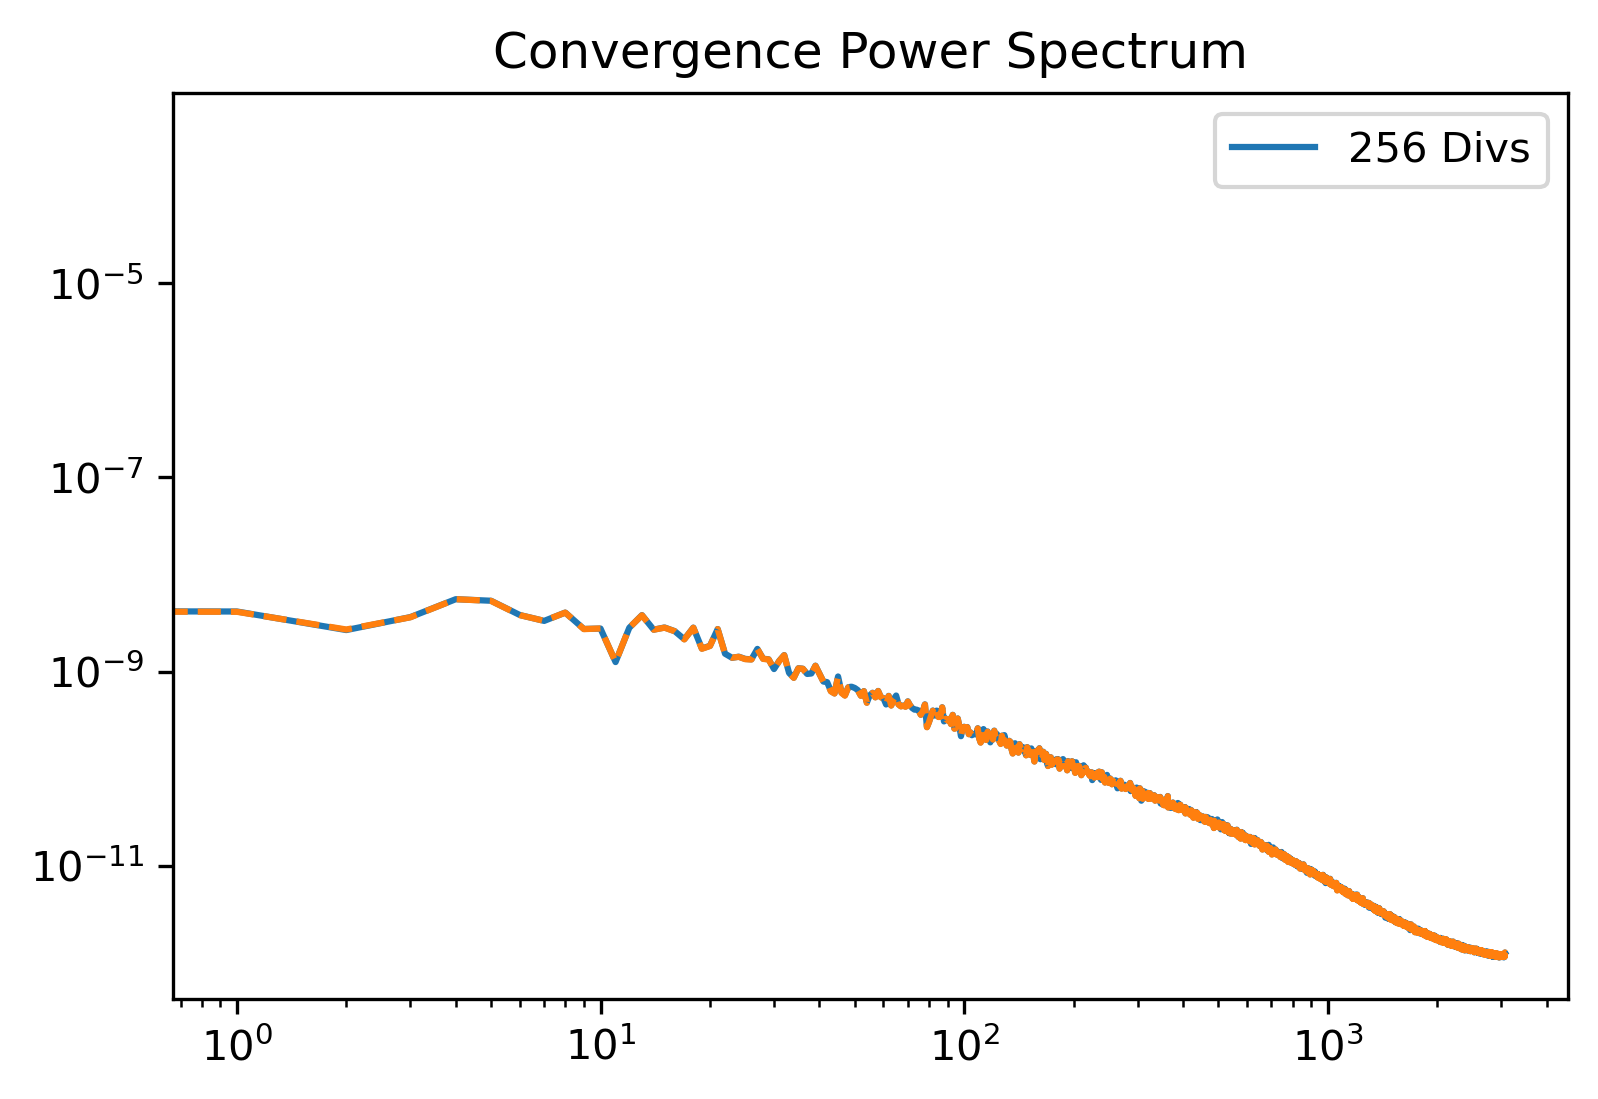

In [12]:
plt.figure(dpi=300)
plt.loglog(psKDV256);
plt.loglog(psKDV128,"--");
plt.legend(loc=0, labels=["256 Divs"])
plt.title("Convergence Power Spectrum")
plt.show()

# CCL

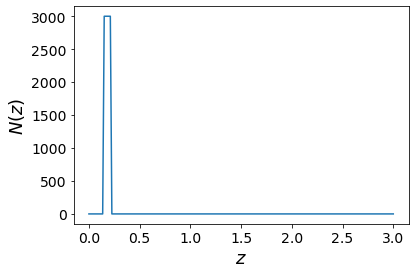

In [13]:
import pyccl as ccl

cosmo = ccl.Cosmology(Omega_c = 0.27, Omega_b = 0.045, h = 0.67, sigma8 = 0.83, n_s = 0.96)

z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

#Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
#pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
#dNdz = Ngal * pz # Number density distribution
dNdz = np.zeros(z.shape)
dNdz[10:15] = 3000
b = 1.5*np.ones(200) #Galaxy bias (constant with scale and z)

plt.xlabel('$z$',fontsize=18)
plt.ylabel('$N(z)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(z, dNdz)
plt.show()

In [14]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz)) #CCL automatically normalizes dNdz
clu1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdz), bias=(z,b))

In [15]:
bias_ia = 1*np.ones_like(z) #A_IA=1 in the NLA model
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz = (z,dNdz), ia_bias = (z,bias_ia))

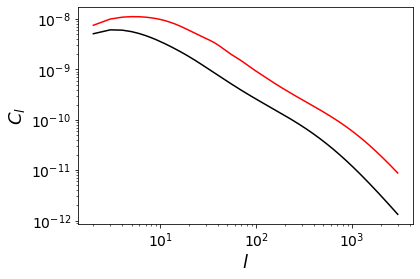

In [16]:
ell = np.arange(2, 3000)

cls = ccl.angular_cl(cosmo, lens1, lens1, ell) #Cosmic shear
cls_ia = ccl.angular_cl(cosmo, lens1_ia, lens1_ia, ell) #Cosmic shear with IA
cls_clu = ccl.angular_cl(cosmo, clu1, clu1, ell) #Clustering

plt.xlabel('$l$',fontsize=18)
plt.ylabel('$C_l$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.plot(ell, cls, 'k-')
plt.plot(ell, cls_ia, 'r-')
plt.show()

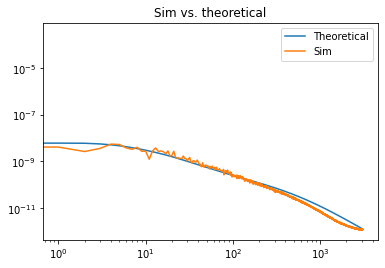

In [17]:
plt.loglog(cls);
plt.loglog(psKDV256);
plt.title("Sim vs. theoretical");
plt.legend(["Theoretical","Sim"]);

# Lensed kSZ

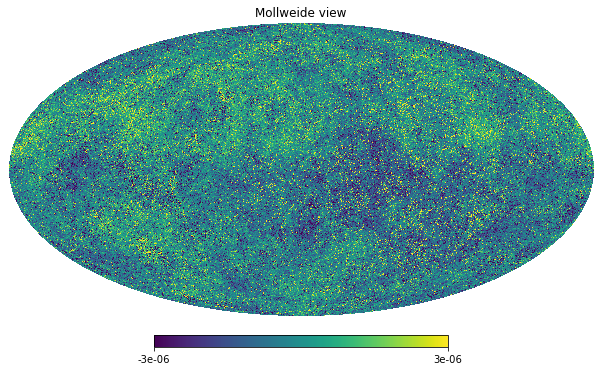

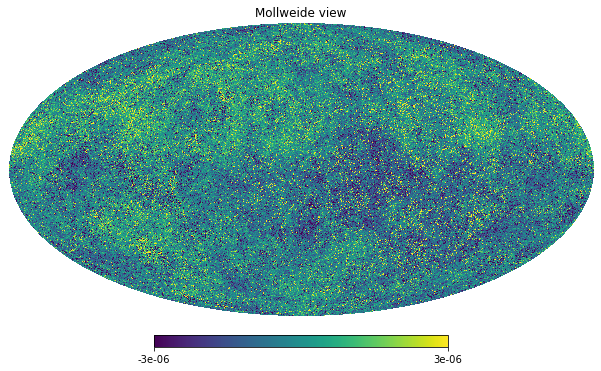

In [20]:
kSZLens = hp.read_map("MAPS/lensedkSZ_NS_1024_R_2048_P_1280_DV_128.fits")
kSZUnLens = hp.read_map("MAPS/kSZ_NS_1024_R_2048_P_1280_DV_128.fits")
hp.mollview(kSZLens,xsize=6400, min=-3*10**-6,max=3*10**-6)
hp.mollview(kSZUnLens,xsize=6400, min=-3*10**-6,max=3*10**-6)

In [21]:
psLens = hp.sphtfunc.anafast(kSZLens)
psUnLens = hp.sphtfunc.anafast(kSZUnLens)

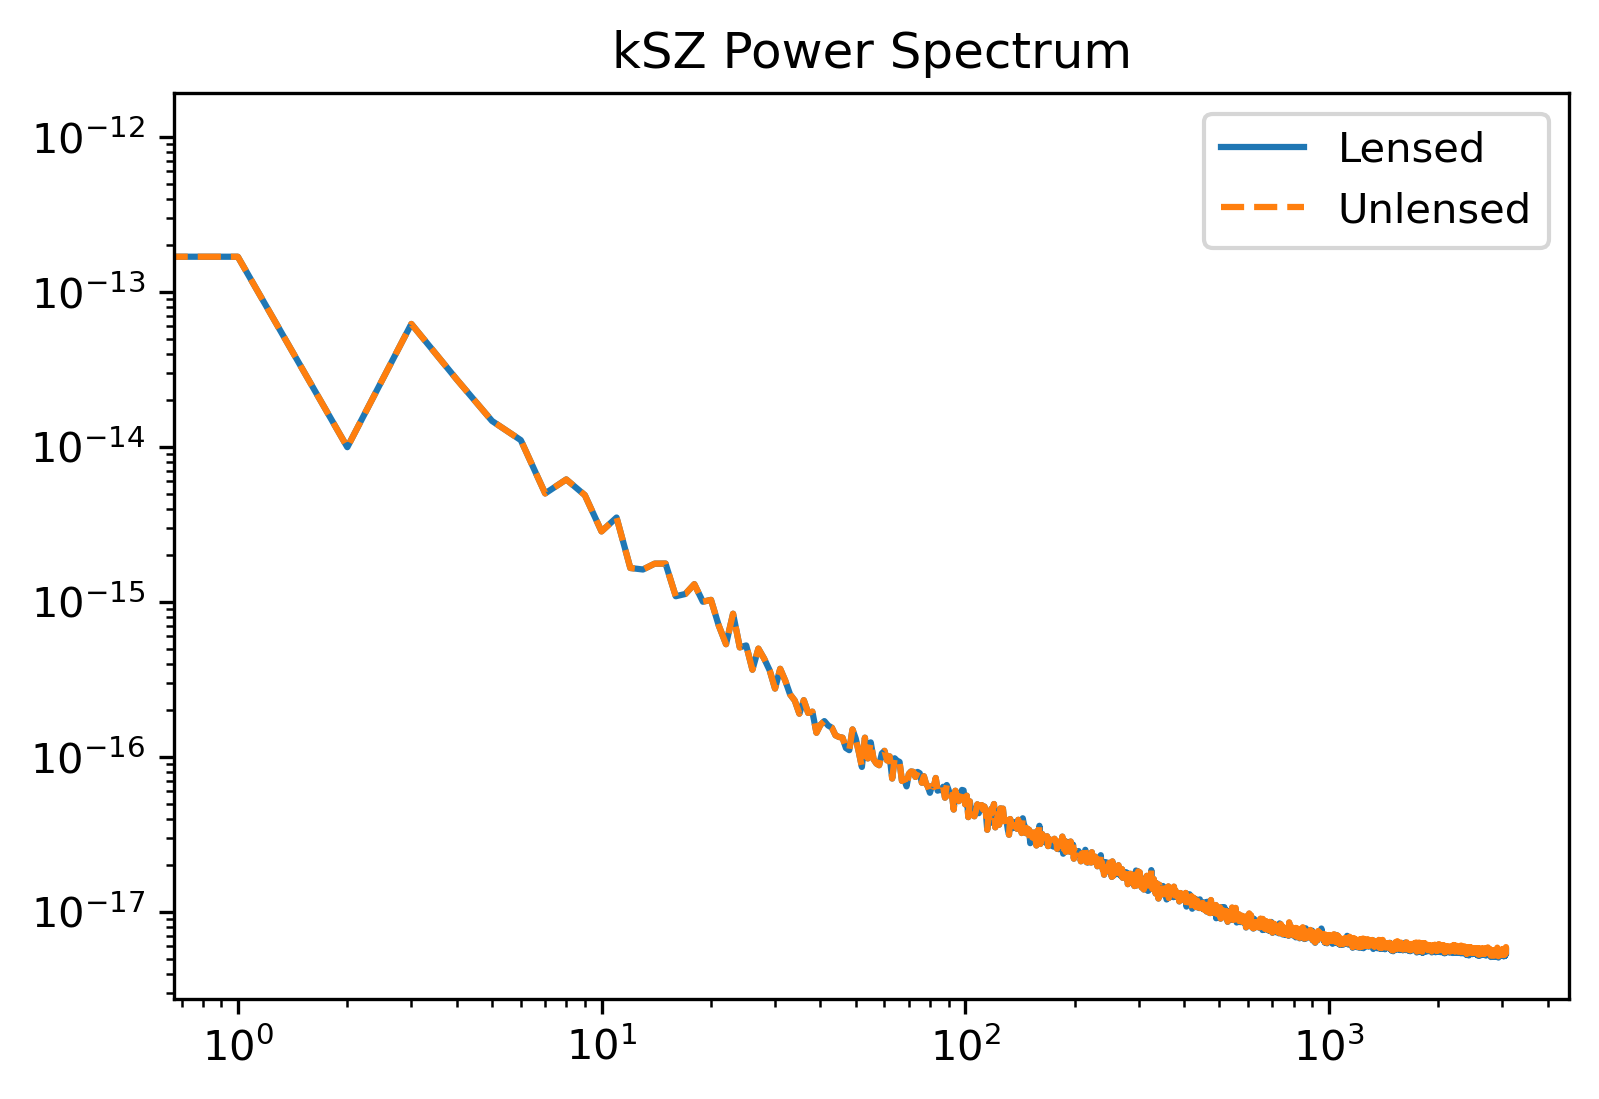

In [27]:
lFactor=np.arange(len(psLens))*(np.arange(len(psLens))+1)
plt.figure(dpi=300)
plt.loglog(psLens);
plt.loglog(psUnLens,"--");
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("kSZ Power Spectrum")
plt.show()

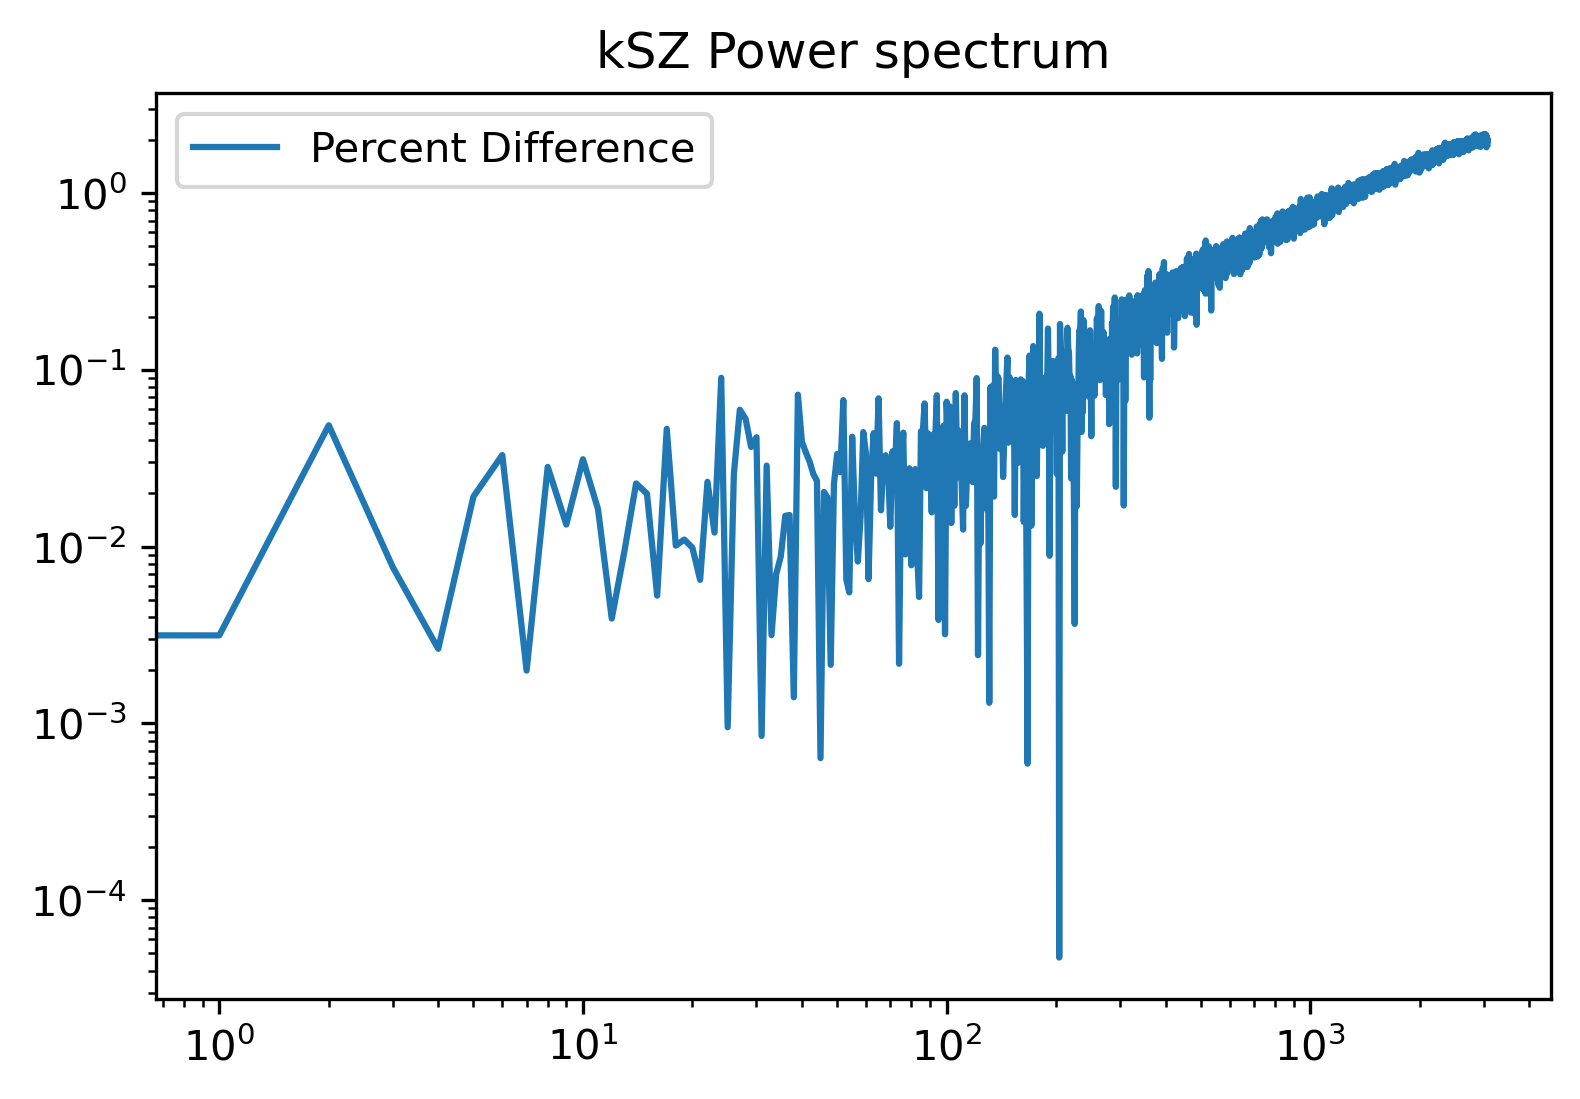

In [23]:
plt.figure(dpi=300)
plt.loglog(np.abs((psLens-psUnLens)/psLens)*100);
plt.legend(loc=0, labels=["Percent Difference"])
plt.title("kSZ Power spectrum")
plt.show()